# Exploration of the Pixar movies 

In [2]:
# Import some libraries 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Read the data from the `data` folder

In [4]:
pixar_data = pd.read_csv("data/PixarMovies.csv")

In [5]:
## Data description
pixar_data.tail(3)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
12,2012,Brave,100,78,7.2,69,66.30,539.0,237.3,243.39,301.7,44.03%,55.97%,185,1,1
13,2013,Monsters University,107,78,7.4,65,82.43,743.6,268.5,269.59,475.1,36.11%,63.89%,200,0,0
14,2015,Inside Out,102,98,8.8,93,90.40,677.1,340.5,340.50,336.6,50.29%,49.71%,175,NaN,NaN


In [50]:
pixar_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 16 columns):
Year Released              15 non-null int64
Movie                      15 non-null object
Length                     15 non-null int64
RT Score                   15 non-null int64
IMDB Score                 15 non-null float64
Metacritic Score           15 non-null int64
Opening Weekend            15 non-null float64
Worldwide Gross            15 non-null float64
Domestic Gross             15 non-null float64
Adjusted Domestic Gross    15 non-null float64
International Gross        15 non-null float64
Domestic %                 15 non-null object
International %            15 non-null object
Production Budget          15 non-null int64
Oscars Nominated           14 non-null float64
Oscars Won                 14 non-null float64
dtypes: float64(8), int64(5), object(3)
memory usage: 2.0+ KB


In [58]:
## Add the latest pixar movie: The Good Dinausaur
### General information
pixar_data.loc[15, 'Year Released'] = 2015
pixar_data.loc[15, 'Movie']= 'The Good Dinosaur'
pixar_data.loc[15, 'Length'] = 100 
### Movie ratings
pixar_data.loc[15, 'RT Score'] = 77
pixar_data.loc[15, 'IMDB Score'] = 7.3
pixar_data.loc[15, 'Metacritic Score'] = 66
# Sources: http://www.the-numbers.com/movies/production-company/Pixar
# 
# Revenues data

pixar_data.loc[15, 'Opening Weekend'] = 39.16
pixar_data.loc[15, 'Worldwide Gross'] = 136.815
pixar_data.loc[15, 'Domestic Gross'] = 81.4
pixar_data.loc[15, 'Adjusted Domestic Gross'] = 78.86
pixar_data.loc[15, 'International Gross'] = 55.4
pixar_data.loc[15, 'Domestic %'] = '59.5%'
pixar_data.loc[15, 'International %'] = '40.5%'
# Cost 
pixar_data.loc[15, 'Production Budget'] = 187.5
# Oscar related information (not yet available)
pixar_data.loc[15, 'Oscars Nominated'] = ''
pixar_data.loc[15, 'Oscars Won'] = ''

In [59]:
## Save the augmented data set
pixar_data.to_csv('data/pixar-movies-updated.csv', index=False)


In [6]:
## Read the augmented data
## Save the augmented data set
pixar_augmented_data = pd.read_csv('data/pixar-movies-updated.csv')

In [15]:
pixar_augmented_data.columns

Index(['Year Released', 'Movie', 'Length', 'RT Score', 'IMDB Score',
       'Metacritic Score', 'Opening Weekend', 'Worldwide Gross',
       'Domestic Gross', 'Adjusted Domestic Gross', 'International Gross',
       'Domestic %', 'International %', 'Production Budget',
       'Oscars Nominated', 'Oscars Won'],
      dtype='object')

## Some exploration plots

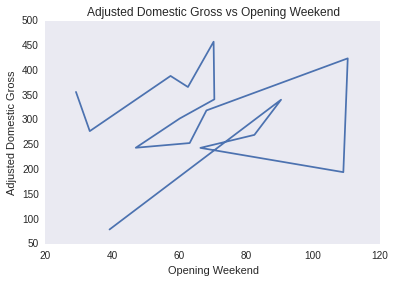

In [9]:
sns.set_style('dark')
# Dataquest inital graph
plt.plot(pixar_augmented_data['Opening Weekend'],pixar_augmented_data['Adjusted Domestic Gross'])
plt.xlabel('Opening Weekend')
plt.ylabel('Adjusted Domestic Gross')
plt.title('Adjusted Domestic Gross vs Opening Weekend ')

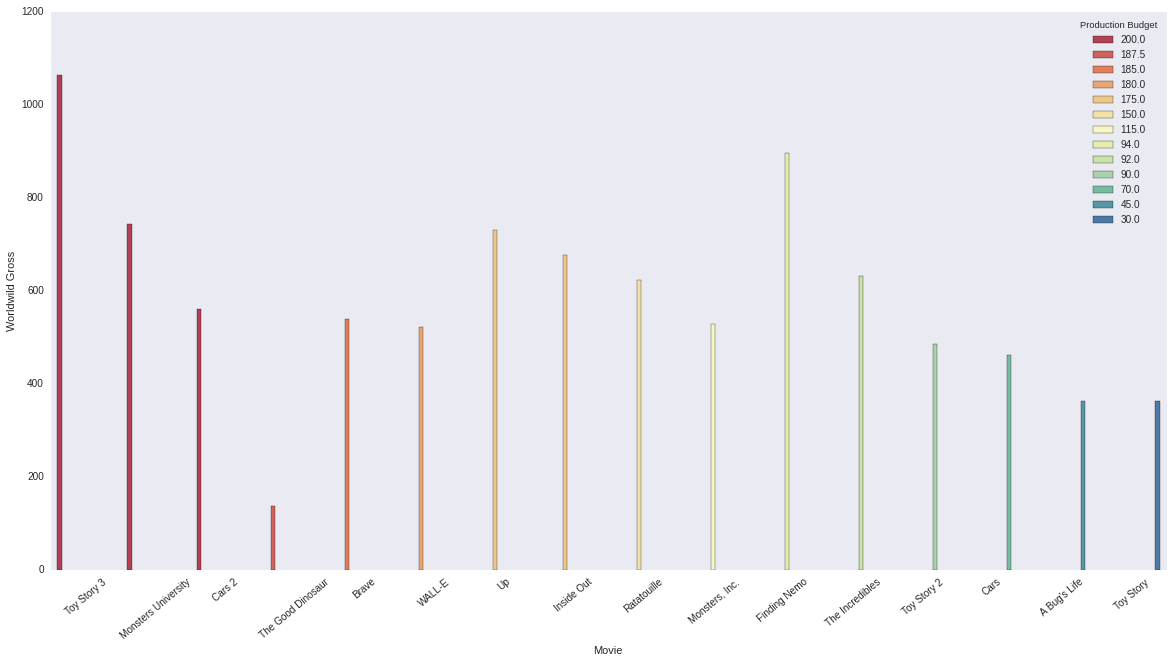

In [38]:
# A barplot
pixar_augmented_data.sort_values("Production Budget", inplace=True, ascending=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=40)
ax = sns.barplot(x="Movie", y="Worldwide Gross", hue="Production Budget", 
                 data=pixar_augmented_data, palette="Spectral")
ax.set_ylabel('Worldwild Gross')

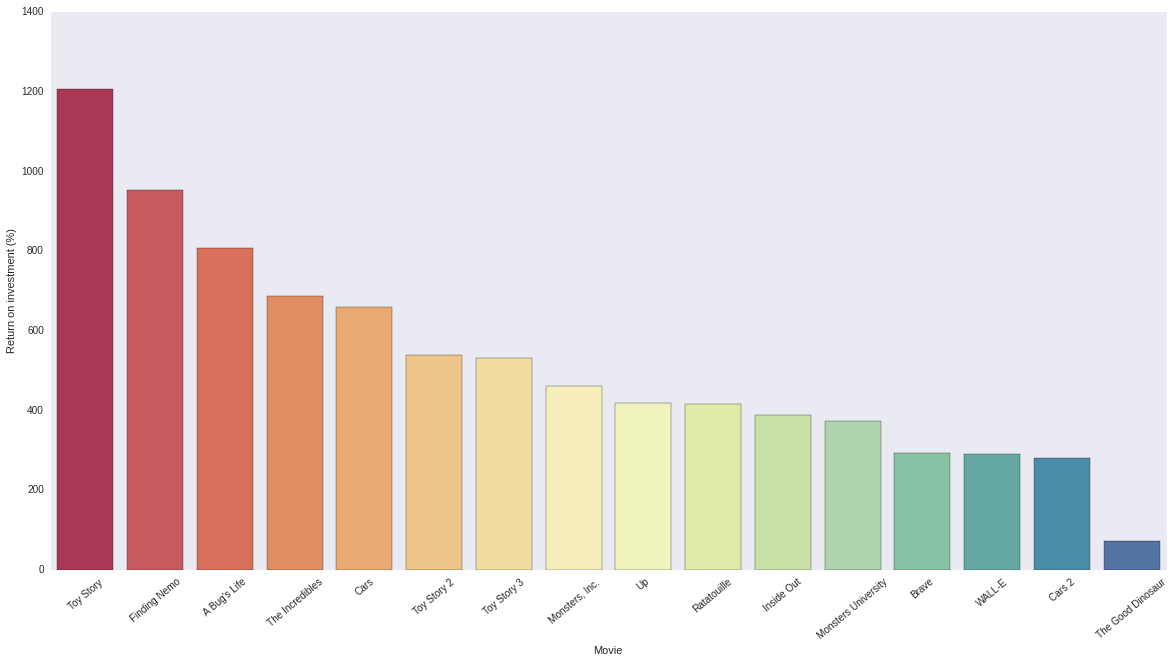

In [42]:
# A ratio barplot: Return on investment (ROI) in %
pixar_augmented_data["ROI"] = 100 * (pixar_augmented_data["Worldwide Gross"] /  pixar_augmented_data["Production Budget"]) 
pixar_augmented_data.sort_values("ROI", inplace=True, ascending=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=40)
ax = sns.barplot(x="Movie", y="ROI", 
                 data=pixar_augmented_data, palette="Spectral")
ax.set_ylabel('Return on investment (%)')

## A D3.js visualization
The embedding of D3 code into the Jupyter notebook is inspired from this notebook https://github.com/cmoscardi/embedded_d3_example/blob/master/Embedded_D3.ipynb

In [19]:
%%javascript
/**Require the d3.js library**/
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
  }
});

<IPython.core.display.Javascript object>

In [46]:
%%HTML
<style>
    body { margin:0;position:fixed;top:0;right:0;bottom:0;left:0; }
    svg { width: 100%; height: 100%; }
</style>

In [43]:
%%javascript

/*
 * As it turns out, pandas returns a dictionary with 
 * the top-level keys as the column headers, and values
 * as the list of values under that column.
 * I'd recommend looking yourself.
 * This function, in JS, converts to what D3 wants.
 * Of course we could also easily do this on the python side.
 */
function convertPlotData(data){
  var convertedData = [];
  //pandas gives each column the same number of
  //objects, arbitrarily choose one to iterate over
  for(var i in data[Object.keys(data)[0]]){
    var convertedDatum = {};
    for(var key in data){
      convertedDatum[key] = data[key][i];
    }
    convertedData.push(convertedDatum);
  }
  return convertedData;
}

window.convertPlotData = convertPlotData;

<IPython.core.display.Javascript object>

In [37]:
# Bind data to the window 
from IPython.display import Javascript
Javascript("""
           window.pixarData={};
           """.format(pixar_data.to_json()))

<IPython.core.display.Javascript object>

In [47]:
%%javascript
require(['d3'], function(d3){
    var margin = {top: 20, right: 10, bottom: 20, left: 10};
    var width = 960 - margin.left - margin.right;
    var height = 500 - margin.top - margin.bottom;
    //if (d3.select("svg")) {d3.select("svg").remove()};
    var svg = d3.select("body").append("svg")
      .attr("width", width + margin.left + margin.right)
      .attr("height", height + margin.top + margin.bottom)
      .append("g")
      .attr("transform", "translate(" + margin.left + "," + margin.top + ")");
    svg.selectAll("rect")
      .data(window.pixarData)
      .enter()
      .append("rect")
      .attr({x: 100, y: 10})
      .attr('width', function(d){ return width - 200})
      .attr('height', function(d) {return height - 20})
      .style({ fill: "#196857"})
    console.log(window.pixarData)
    })

<IPython.core.display.Javascript object>